# Recovery of gold from ore

We need to prepare a prototype of a machine learning model for the "Digit". The company develops solutions for the efficient operation of industrial enterprises.

The model should predict the recovery rate of gold from gold-bearing ore.

The model will help optimize production so as not to launch an enterprise with unprofitable characteristics.

Need:

1. Prepare the data;
2. Conduct a research analysis of the data;
3. Build and train a model.

## Data preparation

### Data description

**Technological process**

* Rougher feed — raw materials
* Rougher additives (or reagent additives) — flotation reagents: Xanthate, Sulfate, Depressant
  * Xanthate **— xanthogenate (promoter, or flotation activator);
  * Sulfate — sulfate (in this production sodium sulfide);
  * Depressant — depressant (sodium silicate).
* Rougher process (English "rough process") — flotation
* Rougher tails — dump tails
* Float banks — flotation plant
* Cleaner process — cleaning
* Rougher Au — rough gold concentrate
* Final Au — final gold concentrate

**Parameters**
* air amount stages — air volume
* fluid levels — liquid level
* feed size — the size of the raw material granules
* feed rate — feed rate

### Name of features

The name of the signs should be as follows:

`[stage].[parameter type].[parameter name]`

Example: `rougher.input.feed_aggregator`

### Data exploration

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('datasets/gold_recovery_train_new.csv', parse_dates=['date'])
df_test = pd.read_csv('datasets/gold_recovery_test_new.csv', parse_dates=['date'])
df_all = pd.read_csv('datasets/gold_recovery_full_new.csv', parse_dates=['date'])

In [3]:
print('Training sample:')
display(df_train.head())
print()
print('Test sample:')
display(df_test.head())
print()
print('Total sample:')
display(df_all.head())

Training sample:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691



Test sample:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333



Total sample:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
print('Training sample:')
print(df_train.info())
print()
print('Test sample:')
print(df_test.info())
print()
print('Total sample:')
print(df_all.info())

Training sample:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14149 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         14148 non-null  float64       
 2   final.output.concentrate_pb                         14148 non-null  float64       
 3   final.output.concentrate_sol                        13938 non-null  float64       
 4   final.output.concentrate_au                         14149 non-null  float64       
 5   final.output.recovery                               14149 non-null  float64       
 6   final.output.tail_ag                                14149 non-null  float64       
 7   final.output.tail_pb                                14049 non-null  float64  

#### Conclusion

The training data consists of 87 columns and 14149 terms

The test data consists of 53 columns and 5290 rows

Total data includes 87 columns and 19439 rows

(some parameters are not available because they are measured and/or calculated much later)

### Calculation of enrichment efficiency

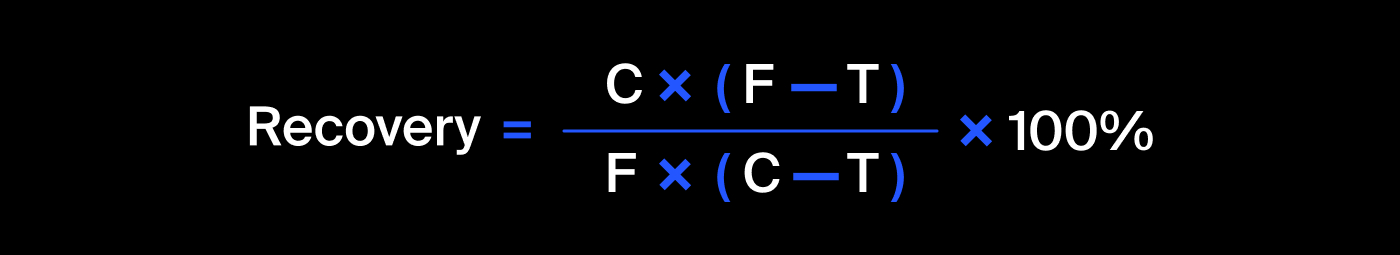

where:
- C - is the proportion of gold in the concentrate after flotation/purification (rougher.output.concentrate_au);
- F - the proportion of gold in the raw material/concentrate before flotation/purification (rougher.input.feed_au);
- T - is the proportion of gold in the tails after flotation/cleaning (rougher.output.tail_au).

In [5]:
c = df_train['rougher.output.concentrate_au']
f = df_train['rougher.input.feed_au']
t = df_train['rougher.output.tail_au']

In [6]:
recovery = (c*(f-t))/(f*(c-t))*100
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [7]:
recovery.describe()

count    14149.000000
mean        82.704502
std         14.479156
min         -0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
dtype: float64

In [8]:
df_train['rougher.output.recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [9]:
mae_train_recovery = mae(recovery,df_train['rougher.output.recovery'])
print('MAE:',mae_train_recovery)

MAE: 9.73512347450521e-15


#### Conclusion

The calculation of the enrichment efficiency in the training sample was checked for correctness and it was revealed that the calculation was carried out correctly.

Resulting value turned out to be small enough to be able to assert the correctness of the calculation

MAE is very close to zero.

### Analysis of unavailable features in the test sample

In [10]:
print("Missing columns in the test sample:")
dif_col = df_all.columns.difference(df_test.columns)
dif_col = pd.Series(dif_col)
dif_col

Missing columns in the test sample:


0                           final.output.concentrate_ag
1                           final.output.concentrate_au
2                           final.output.concentrate_pb
3                          final.output.concentrate_sol
4                                 final.output.recovery
5                                  final.output.tail_ag
6                                  final.output.tail_au
7                                  final.output.tail_pb
8                                 final.output.tail_sol
9                 primary_cleaner.output.concentrate_ag
10                primary_cleaner.output.concentrate_au
11                primary_cleaner.output.concentrate_pb
12               primary_cleaner.output.concentrate_sol
13                       primary_cleaner.output.tail_ag
14                       primary_cleaner.output.tail_au
15                       primary_cleaner.output.tail_pb
16                      primary_cleaner.output.tail_sol
17                      rougher.calculation.au_p

In [11]:
print("Number of missing columns:",len(df_all.columns.difference(df_test.columns)))

Number of missing columns: 34


#### Conclusion
The missing columns in the test sample are:
- "product parameters" (output) at each stage of processing;
- "design characteristics" (calculations) after the flotation process;
- target features "roughing concentrate enrichment efficiency" (rougher.output.recovery) and "final concentrate enrichment efficiency" (final.output.recovery).

So they will have to be excluded from the training sample

### Data preprocessing

#### Processing of omissions

In [12]:
df_train.isna().sum().sum()

4100

In [13]:
df_test.isna().sum().sum()

90

In [14]:
df_all.isna().sum().sum()

4481

As you can see, the datasets contain omissions

In order to fill in these gaps, it was decided to use the **interpolate method**

In [15]:
df_train.index = df_train['date']
df_train.drop('date',axis=1,inplace=True)
df_train.interpolate(method='time',inplace=True)
print('Number of missing values after processing:', df_train.isna().sum().sum())

Number of missing values after processing: 0


In [16]:
df_test.index = df_test['date']
df_test.drop('date',axis=1,inplace=True)
df_test.interpolate(method='time',inplace=True)
print('Number of missing values after processing:', df_test.isna().sum().sum())

Number of missing values after processing: 0


In [17]:
df_all.index = df_all['date']
df_all.drop('date',axis=1,inplace=True)
df_all.interpolate(method='time',inplace=True)
print('Number of missing values after processing:', df_all.isna().sum().sum())

Number of missing values after processing: 0


#### Adding target features to the test sample and processing the training sample

In [18]:
target_col = ['rougher.output.recovery','final.output.recovery']

In [19]:
dif_col = list(dif_col)
dif_col_new = []

for i in dif_col:
    if i not in target_col:
        dif_col_new.append(i)

In [20]:
df_train.drop(columns=dif_col_new, inplace=True)

In [21]:
df_test = pd.merge(df_test, df_all[target_col], left_index=True, right_index=True)
df_test.head()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


#### Conclusion

1) The missing values were filled in by the interpolate method;

2) Missing data in the test sample was deleted in the training;

3) Target features have been added to the test sample

## Data analysis

### Concentration of metals (Au, Ag, Pb) at various stages of purification

#### Concentration of metals (Au, Ag, Pb) at the flotation stage

In [22]:
au_conc_flot = df_all.reset_index()['rougher.output.concentrate_au']
ag_conc_flot = df_all.reset_index()['rougher.output.concentrate_ag']
pb_conc_flot = df_all.reset_index()['rougher.output.concentrate_pb']

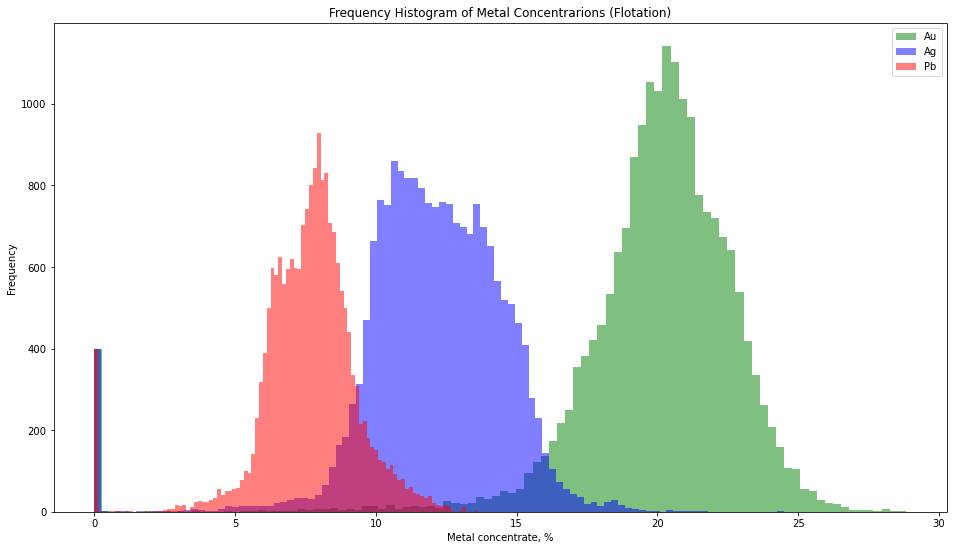

In [23]:
kwargs = dict(alpha=0.5, bins=100)
plt.figure(figsize=(16,9))
plt.hist(au_conc_flot, **kwargs, color='g', label='Au')
plt.hist(ag_conc_flot, **kwargs, color='b', label='Ag')
plt.hist(pb_conc_flot, **kwargs, color='r', label='Pb')
plt.gca().set(title='Frequency Histogram of Metal Concentrarions (Flotation)', 
              ylabel='Frequency', xlabel = 'Metal concentrate, %')
plt.legend()

##### Conclusion

As can be seen from the graphs, at the flotation stage:
- Au metal has the highest concentration;
- The intermediate concentration value is Ag;
- Pb metal has the lowest concentration.

#### Concentration of metals (Au, Ag, Pb) at the stage of primary purification

In [24]:
au_conc_primary = df_all.reset_index()['primary_cleaner.output.concentrate_au']
ag_conc_primary = df_all.reset_index()['primary_cleaner.output.concentrate_ag']
pb_conc_primary = df_all.reset_index()['primary_cleaner.output.concentrate_pb']

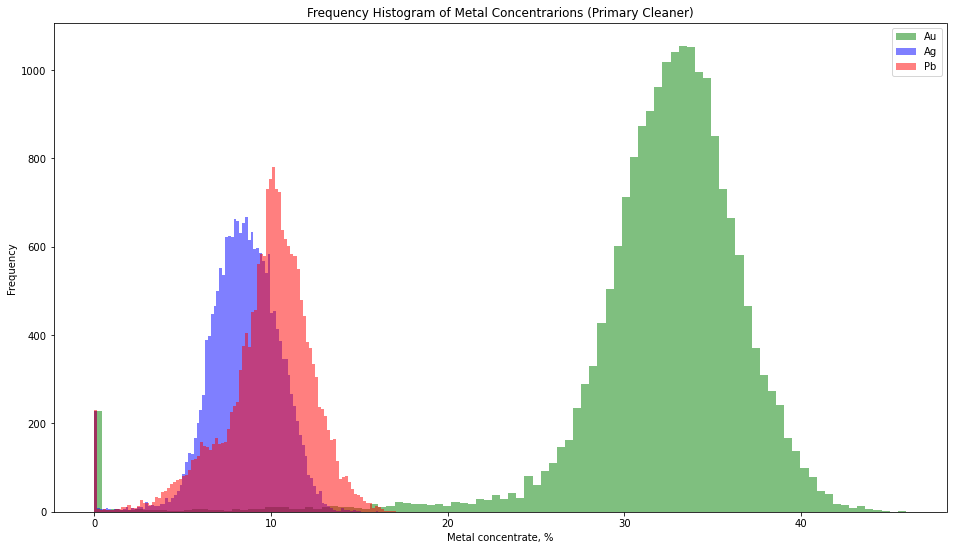

In [25]:
kwargs = dict(alpha=0.5, bins=100)
plt.figure(figsize=(16,9))
plt.hist(au_conc_primary, **kwargs, color='g', label='Au')
plt.hist(ag_conc_primary, **kwargs, color='b', label='Ag')
plt.hist(pb_conc_primary, **kwargs, color='r', label='Pb')
plt.gca().set(title='Frequency Histogram of Metal Concentrarions (Primary Cleaner)', 
              ylabel='Frequency', xlabel = 'Metal concentrate, %')
plt.legend()

##### Conclusion

As can be seen from the graphs, at the stage of primary processing:
- Au metal still has the highest concentration, but it has increased significantly;
- The concentration of metal Ag has decreased slightly;
- The concentration of Pb metal has slightly increased.

#### Concentration of metals (Au, Ag, Pb) at the final stage of purification

In [26]:
au_conc_final = df_all.reset_index()['final.output.concentrate_au']
ag_conc_final = df_all.reset_index()['final.output.concentrate_ag']
pb_conc_final = df_all.reset_index()['final.output.concentrate_pb']

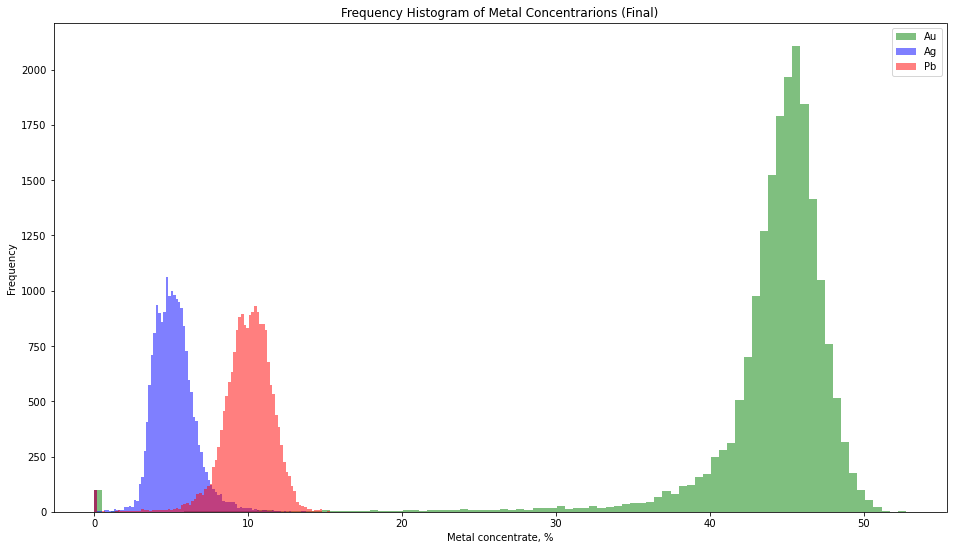

In [27]:
kwargs = dict(alpha=0.5, bins=100)
plt.figure(figsize=(16,9))
plt.hist(au_conc_final, **kwargs, color='g', label='Au')
plt.hist(ag_conc_final, **kwargs, color='b', label='Ag')
plt.hist(pb_conc_final, **kwargs, color='r', label='Pb')
plt.gca().set(title='Frequency Histogram of Metal Concentrarions (Final)', ylabel='Frequency', xlabel = 'Metal concentrate, %')
plt.legend()

##### Conclusion

As can be seen from the graphs, at the stage of primary processing:
- Au metal still has the highest concentration, but it has increased significantly;
- The concentration of metal Ag has decreased slightly;
- The concentration of Pb metal remained approximately at the same level.

#### General Conclusion

The concentration of metals varied at different stages of purification

The median concentration values changed as follows:

- Au - flotation (21%), final concentration (46%)
- Ag - flotation (12%), final concentration (5%)
- Pb - flotation (7%), final concentration (10%)

### Comparison of raw material granule distributions

In [28]:
feed_size_train = df_train['rougher.input.feed_size']
feed_size_test = df_test['rougher.input.feed_size']

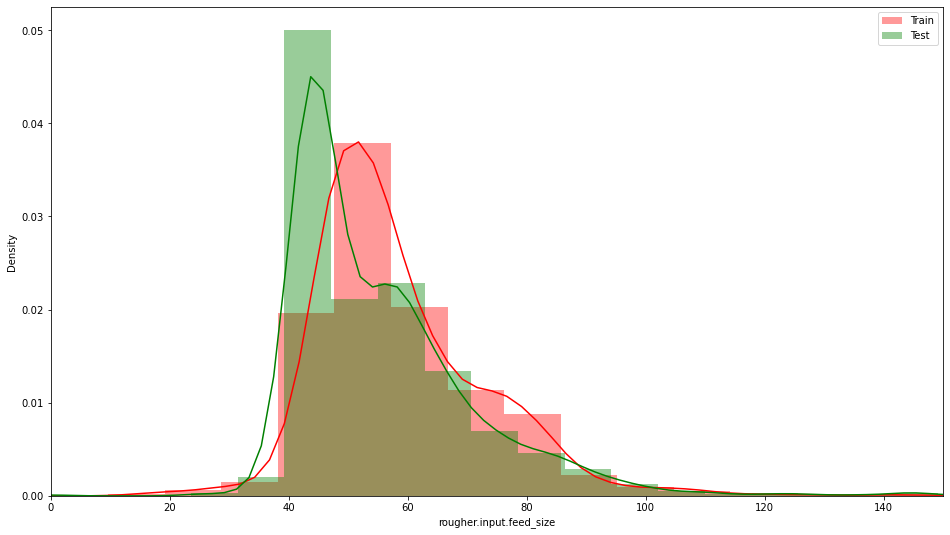

In [29]:
plt.figure(figsize=(16,9))
sns.distplot(feed_size_train, color='r', label='Train')
sns.distplot(feed_size_test, color='g', label='Test')
plt.xlim(0,150)
plt.legend()

#### Conclusion

The distribution of raw material granules in the test and training samples are similar, the sample can be considered representative

### The total concentration of all substances at different stages: in raw materials, in rough and final concentrates

In [30]:
au_conc_flot = df_all.reset_index()['rougher.input.feed_au']
ag_conc_flot = df_all.reset_index()['rougher.input.feed_ag']
pb_conc_flot = df_all.reset_index()['rougher.input.feed_pb']

au_conc_primary = df_all.reset_index()['rougher.output.concentrate_au']
ag_conc_primary = df_all.reset_index()['rougher.output.concentrate_ag']
pb_conc_primary = df_all.reset_index()['rougher.output.concentrate_pb']

In [31]:
df_sum_conc_rough = au_conc_flot+ag_conc_flot+pb_conc_flot+df_all.reset_index()['rougher.input.feed_sol']
df_sum_conc_primary = au_conc_primary+ag_conc_primary+pb_conc_primary+df_all.reset_index()['rougher.output.concentrate_sol']
df_sum_conc_final = au_conc_final+ag_conc_final+pb_conc_final+df_all.reset_index()['final.output.concentrate_sol']

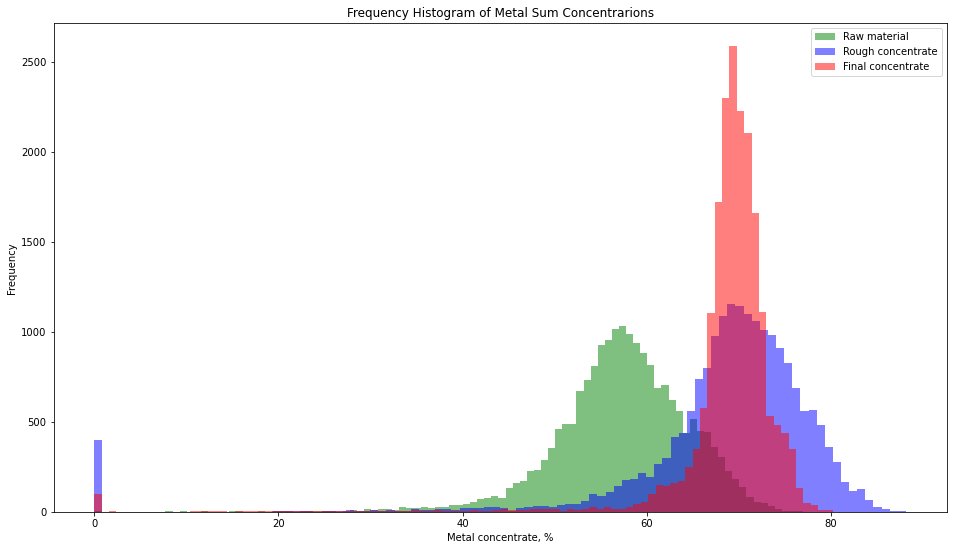

In [32]:
kwargs = dict(alpha=0.5, bins=100)
plt.figure(figsize=(16,9))
plt.hist(df_sum_conc_rough, **kwargs, color='g', label='Raw material')
plt.hist(df_sum_conc_primary, **kwargs, color='b', label='Rough concentrate')
plt.hist(df_sum_conc_final, **kwargs, color='r', label='Final concentrate')
plt.gca().set(title='Frequency Histogram of Metal Sum Concentrarions', ylabel='Frequency', xlabel = 'Metal concentrate, %')
plt.legend()

In [33]:
print(df_sum_conc_rough.describe())
print()
print(df_sum_conc_primary.describe())
print()
print(df_sum_conc_final.describe())

count    19439.000000
mean        57.318892
std          7.211533
min          0.040000
25%         53.552406
50%         57.587818
75%         61.953459
max         76.978947
dtype: float64

count    19439.000000
mean        68.174751
std         12.485095
min          0.000000
25%         66.015877
50%         70.181987
75%         74.358248
max         88.140119
dtype: float64

count    19439.000000
mean        68.659392
std          7.422649
min          0.000000
25%         67.934878
50%         69.599462
75%         71.368472
max         80.210644
dtype: float64


At all stages, concentrations of 0% are present, and it is also clear from the distributions that there are data with a very low frequency in the range of 0-40%.

In order not to confuse the model, it was decided to remove this data from all samples.

In [34]:
# We remove data from the general sample where the total concentration is less than 40% at each of the stages

# Raw material stage
df_all = df_all.query('`rougher.input.feed_au`+`rougher.input.feed_ag`+`rougher.input.feed_pb`+`rougher.input.feed_sol` >= 40')

# Draft material stage
df_all = df_all.query('`rougher.output.concentrate_au`+`rougher.output.concentrate_ag`+`rougher.output.concentrate_pb`+`rougher.output.concentrate_sol` >= 40')

# Final processing stage
df_all = df_all.query('`final.output.concentrate_au`+`final.output.concentrate_ag`+`final.output.concentrate_pb`+`final.output.concentrate_sol` >= 40')

In [35]:
df_train = df_train[df_train.index.isin(df_all.index)]
df_test = df_test[df_test.index.isin(df_all.index)]

In [36]:
sum_conc_flot = df_all['rougher.input.feed_au']+df_all['rougher.input.feed_ag']+df_all['rougher.input.feed_pb']+df_all['rougher.input.feed_sol']
sum_conc_primary = df_all['rougher.output.concentrate_au']+df_all['rougher.output.concentrate_ag']+df_all['rougher.output.concentrate_pb']+df_all['rougher.output.concentrate_sol']
sum_conc_final = df_all['final.output.concentrate_au']+df_all['final.output.concentrate_ag']+df_all['final.output.concentrate_pb']+df_all['final.output.concentrate_sol']

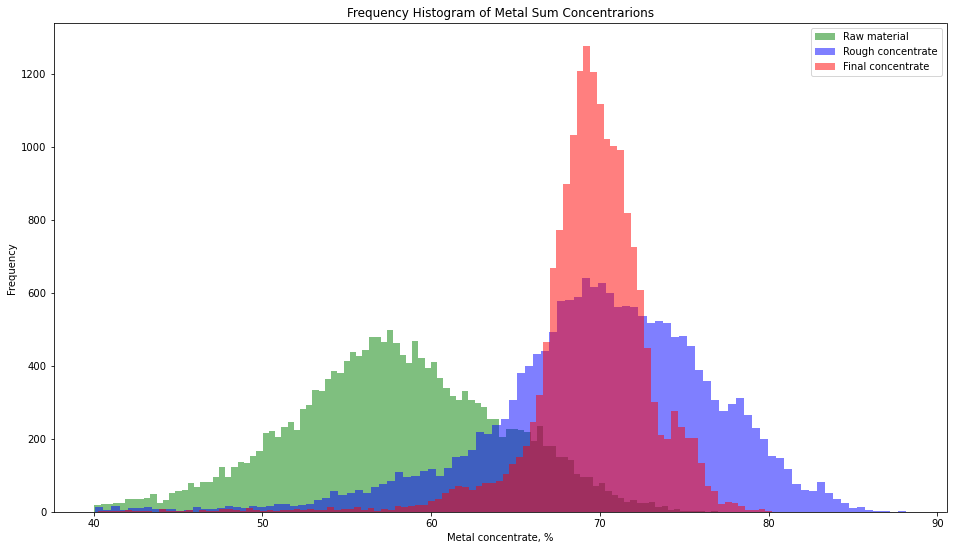

In [37]:
kwargs = dict(alpha=0.5, bins=100)
plt.figure(figsize=(16,9))
plt.hist(sum_conc_flot, **kwargs, color='g', label='Raw material')
plt.hist(sum_conc_primary, **kwargs, color='b', label='Rough concentrate')
plt.hist(sum_conc_final, **kwargs, color='r', label='Final concentrate')
plt.gca().set(title='Frequency Histogram of Metal Sum Concentrarions', ylabel='Frequency', xlabel = 'Metal concentrate, %')
plt.legend()

#### Conclusion

In order not to confuse the model, it was decided to remove from the data lines in which the total concentration of metals was below 40%

## Model

### Function for calculating the final sMAPE

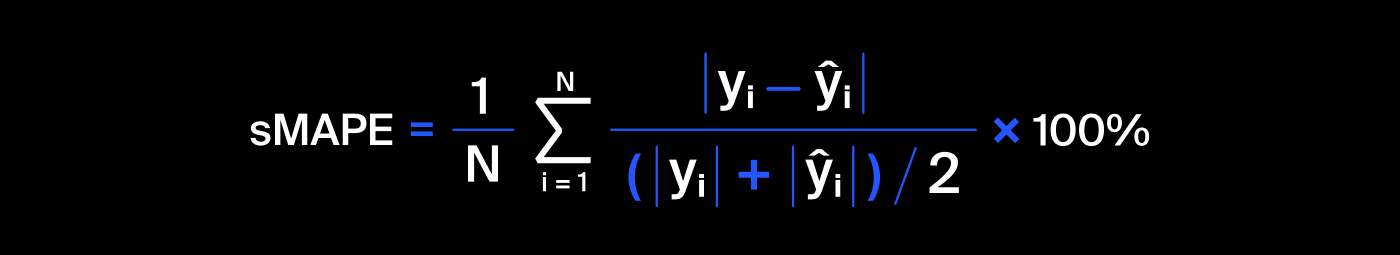

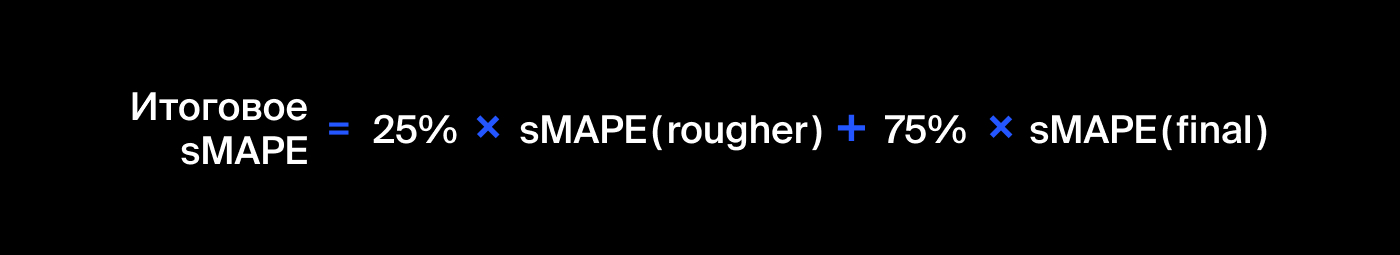

y - target, y^ - prediction

In [38]:
def smape_final(target_rough,prediction_rough,target_fin,prediction_fin):
    smape_rough = abs(target_rough-prediction_rough)/((abs(target_rough)+abs(prediction_rough))/2)
    smape_rough = smape_rough.sum()/len(smape_rough)*100
    
    smape_fin = abs(target_fin-prediction_fin)/((abs(target_fin)+abs(prediction_fin))/2)
    smape_fin = smape_fin.sum()/len(smape_fin)*100
    
    return 0.25*smape_rough+0.75*smape_fin

### Training of different models

In [39]:
df_train.reset_index(inplace=True)
df_train.drop('date',axis=1,inplace=True)

In [40]:
features = df_train.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
target = df_train[['rougher.output.recovery','final.output.recovery']]

#### Linear Regression

In [41]:
# LinearRegression
mae_r = []
mae_f = []

smape_final_list = []

sample_size = int(len(df_train)/4)

for i in range(0, len(df_train), sample_size):
    valid_indexes = df_train.iloc[i:i+sample_size].index
    train_indexes = (df_train.iloc[:i] + df_train.iloc[i + sample_size:]).index
    
    features_train = features.iloc[train_indexes]
    features_valid = features.iloc[valid_indexes]
    target_train = target.iloc[train_indexes]
    target_valid = target.iloc[valid_indexes]

    model_lr = LinearRegression()
    
    model_lr_r = model_lr.fit(features_train, target_train['rougher.output.recovery'])
    model_predictions_r = model_lr_r.predict(features_valid)
    model_predictions_r = pd.Series(model_predictions_r,index=features_valid.index)
    
    model_lr_f = model_lr.fit(features_train, target_train['final.output.recovery'])
    model_predictions_f = model_lr_f.predict(features_valid)
    model_predictions_f = pd.Series(model_predictions_f,index=features_valid.index)
    
    mae_r_score = mean_absolute_error(target_valid['rougher.output.recovery'], model_predictions_r)
    mae_f_score = mean_absolute_error(target_valid['final.output.recovery'], model_predictions_f)

    mae_r.append(mae_r_score)
    mae_f.append(mae_f_score)
    
    smape_final_list.append(smape_final(target_valid['rougher.output.recovery'],model_predictions_r,target_valid['final.output.recovery'],model_predictions_f))

        
mae_r = mae_r[:-1]   
mae_f = mae_f[:-1] 


final_mae_r_score = sum(mae_r)/len(mae_r)
final_mae_f_score = sum(mae_f)/len(mae_f)

if len(df_train)%4 != 0:
            smape_final_list = smape_final_list[:-1]
final_sMAPE_score = sum(smape_final_list)/len(smape_final_list)

print('Average MAE rough:', round(final_mae_r_score,3))
print('Average MAE final:', round(final_mae_f_score,3))
print('Final sMAPE:', round(final_sMAPE_score,3))

Average MAE rough: 6.186
Average MAE final: 6.792
Final sMAPE: 9.718


#### Decision Tree

In [42]:
# Decision Tree

# sample_size for validation
sample_size = int(len(df_train)/4)

best_depth = 0
best_smape_score = 1000000000000000
    
for max_depth in range(2,10):
    smape_final_list = []
    for i in range(0, len(df_train), sample_size):
        valid_indexes = df_train.iloc[i:i+sample_size].index
        train_indexes = (df_train.iloc[:i] + df_train.iloc[i + sample_size:]).index

        features_train = features.iloc[train_indexes]
        features_valid = features.iloc[valid_indexes]
        target_train = target.iloc[train_indexes]
        target_valid = target.iloc[valid_indexes]

        model_dt=DecisionTreeRegressor(random_state=12345,max_depth=max_depth)

        model_dt_r = model_dt.fit(features_train, target_train['rougher.output.recovery'])
        model_predictions_r = model_dt_r.predict(features_valid)
        model_predictions_r = pd.Series(model_predictions_r,index=features_valid.index)

        model_dt_f = model_dt.fit(features_train, target_train['final.output.recovery'])
        model_predictions_f = model_dt_f.predict(features_valid)
        model_predictions_f = pd.Series(model_predictions_f,index=features_valid.index)

        smape_final_list.append(smape_final(target_valid['rougher.output.recovery'],
                                            model_predictions_r,target_valid['final.output.recovery'],model_predictions_f))

    if len(df_train)%4 != 0:
            smape_final_list = smape_final_list[:-1]
    final_sMAPE_score = sum(smape_final_list)/len(smape_final_list)
    if final_sMAPE_score < best_smape_score:
        best_smape_score = final_sMAPE_score
        best_depth = max_depth

print('Best max_depth:', best_depth)
print('Final sMAPE:', round(best_smape_score,3))

Best max_depth: 2
Final sMAPE: 9.256


#### Random Forest

In [43]:
%%time
# Random Forest

# sample_size for validation
sample_size = int(len(df_train)/4)

best_depth = 0
best_estimators = 0
best_smape_score = 1000000000000000
    
for estimators in range(50,111,20):
    for max_depth in range(2,9):
        smape_final_list = []
        for i in range(0, len(df_train), sample_size):
            valid_indexes = df_train.iloc[i:i+sample_size].index
            train_indexes = (df_train.iloc[:i] + df_train.iloc[i + sample_size:]).index
    
            features_train = features.iloc[train_indexes]
            features_valid = features.iloc[valid_indexes]
            target_train = target.iloc[train_indexes]
            target_valid = target.iloc[valid_indexes]
            
            model_rndm=RandomForestRegressor(random_state=12345,max_depth=max_depth,n_estimators=estimators)
            
            model_rndm_r = model_rndm.fit(features_train, target_train['rougher.output.recovery'])
            model_predictions_r = model_rndm_r.predict(features_valid)
            model_predictions_r = pd.Series(model_predictions_r,index=features_valid.index)

            model_rndm_f = model_rndm.fit(features_train, target_train['final.output.recovery'])
            model_predictions_f = model_rndm_f.predict(features_valid)
            model_predictions_f = pd.Series(model_predictions_f,index=features_valid.index)

            smape_final_list.append(smape_final(target_valid['rougher.output.recovery'],
                                                model_predictions_r,target_valid['final.output.recovery'],model_predictions_f))
            
        if len(df_train)%4 != 0:
            smape_final_list = smape_final_list[:-1]
        final_sMAPE_score = sum(smape_final_list)/len(smape_final_list)
        if final_sMAPE_score < best_smape_score:
            best_smape_score = final_sMAPE_score
            best_depth = max_depth
            best_estimators = estimators

print('Best max_depth:', best_depth)
print('Best estimators:', best_estimators)
print('Final sMAPE:', round(best_smape_score,3))

Best max_depth: 8
Best estimators: 50
Final sMAPE: 8.73
Wall time: 1h 56min 10s


#### Conclusion

The optimal value of SMAPE was obtained in a Random Forest model:

In [44]:
print('Best max_depth:', best_depth)
print('Best estimators:', best_estimators)
print('Final sMAPE:', round(best_smape_score,3))

Best max_depth: 8
Best estimators: 50
Final sMAPE: 8.73


### Test Model

In [45]:
df_test.reset_index(inplace=True)
df_test.drop('date',axis=1,inplace=True)

features = df_test.drop(['rougher.output.recovery','final.output.recovery'],axis=1)
target = df_test[['rougher.output.recovery','final.output.recovery']]

In [46]:
#%%time
# Random Forest

sample_size = int(len(df_test)/4)
    
smape_final_list = []
fake_smape_final_list = []

for i in range(0, len(df_test), sample_size):
    valid_indexes = df_test.iloc[i:i+sample_size].index
    train_indexes = (df_test.iloc[:i] + df_test.iloc[i + sample_size:]).index

    features_train = features.iloc[train_indexes]
    features_valid = features.iloc[valid_indexes]
    target_train = target.iloc[train_indexes]
    target_valid = target.iloc[valid_indexes]

    model_rndm=RandomForestRegressor(random_state=12345,max_depth=best_depth,n_estimators=best_estimators)

    model_rndm_r = model_rndm.fit(features_train, target_train['rougher.output.recovery'])
    model_predictions_r = model_rndm_r.predict(features_valid)
    model_predictions_r = pd.Series(model_predictions_r,index=features_valid.index)

    model_rndm_f = model_rndm.fit(features_train, target_train['final.output.recovery'])
    model_predictions_f = model_rndm_f.predict(features_valid)
    model_predictions_f = pd.Series(model_predictions_f,index=features_valid.index)
    
    model_predictions_r_fake = pd.Series(70,index=target_valid.index)
    model_predictions_f_fake = pd.Series(70,index=target_valid.index)

    smape_final_list.append(smape_final(target_valid['rougher.output.recovery'],
                                        model_predictions_r,target_valid['final.output.recovery'],model_predictions_f))

    fake_smape_final_list.append(smape_final(target_valid['rougher.output.recovery'],
                                             model_predictions_r_fake,target_valid['final.output.recovery'],
                                             model_predictions_f_fake))

if len(df_test)%4 != 0:
    smape_final_list = smape_final_list[:-1]
    fake_smape_final_list = fake_smape_final_list[:-1]
    
final_sMAPE_score = sum(smape_final_list)/len(smape_final_list)
fake_final_sMAPE_score = sum(fake_smape_final_list)/len(fake_smape_final_list)

print('Final sMAPE:', round(final_sMAPE_score,3))
print('sMAPE (constant model):', round(fake_final_sMAPE_score,3))

Final sMAPE: 7.759
sMAPE (constant model): 10.762


#### Conclusion

The selected model performed good in the test sample

Also, the adequacy of the model was tested on a synthetic constant model (the sMAPE value of the constant model is higher than that of the model on the test data)

Thus, it can be concluded that the trained model is adequate and allows optimally accurate prediction of the values of both target features.